**Alzheimer's Binary Categorical Classification**

**Model Training & Testing Code**

**Device - Nvidia RTX 3050 GPU**

**Classes - [Dementia (Alzheimer's), Cognitively Normal**]

In [1]:
import glob
import numpy as np
import pandas as pd
import nibabel as nib
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout, Concatenate

In [3]:
file_names = glob.glob("/kaggle/input/oas3-t2w-l/Train_Data/*.nii")
print(len(file_names))

558


In [4]:
train_y_df = pd.read_csv("/kaggle/input/oas3-t2w-l/Train_csv_model.csv")
train_y_df["CDRTOT"].value_counts()

CDRTOT
2.0    194
0.5    127
1.0    126
0.0    111
Name: count, dtype: int64

In [5]:
# shapes = {}
# for i in file_names:
#     nii_data = nib.load(i).get_fdata()

#     if (shapes.get(nii_data.shape) == None):
#         shapes[nii_data.shape] = 1
#     else:
#         shapes[nii_data.shape] = shapes[nii_data.shape] + 1

# print(shapes)

In [6]:
train_y_list = train_y_df.values.tolist()

print(train_y_list[0])
print(train_y_list[0][3:11])

['OAS30001_MR_d0129', 'OAS30001_UDSb4_d0000', 0, 65.19, 28.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0]
[65.19, 28.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0]


In [7]:
X = []
Y = []

# range(len(file_names))
for i in range(len(file_names)):
    nii_data = nib.load(file_names[i]).get_fdata()
    nii_data_shape = nii_data.shape
    nii_data_images = []

    (required_x, required_y, required_z) = (88, 120, 4)

    lower_limit_x = int(nii_data_shape[0] / 2) - required_x
    upper_limit_x = int(nii_data_shape[0] / 2) + required_x

    lower_limit_y = int(nii_data_shape[1] / 2) - required_y
    upper_limit_y = int(nii_data_shape[1] / 2) + required_y

    lower_limit_z = int(nii_data_shape[2] / 2) - required_z
    upper_limit_z = int(nii_data_shape[2] / 2) + required_z

    for z in range(lower_limit_z, upper_limit_z):
        X.append([nii_data[lower_limit_x:upper_limit_x, lower_limit_y:upper_limit_y, z], np.array(train_y_list[i][3:11])])

        if (train_y_list[i][-1] == 0):
            Y.append(0)
        else:
            Y.append(1)

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) o

In [8]:
print(len(X))
print(len(Y))

4464
4464


In [9]:
x, test_x, y, test_y = train_test_split(X, Y, test_size = 0.2, random_state = 42)

print(len(x))
print(len(y))
print(len(test_x))
print(len(test_y))

3571
3571
893
893


In [10]:
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [11]:
train_x_image = []
val_x_image = []

train_x_data = []
val_x_data = []

for i, j in train_x:
    train_x_image.append(i)
    train_x_data.append(j)

for i, j in val_x:
    val_x_image.append(i)
    val_x_data.append(j)

train_x_image = np.array(train_x_image) / 255
train_x_data = np.array(train_x_data)

val_x_image = np.array(val_x_image) / 255
val_x_data = np.array(val_x_data)

train_y = np.array(train_y)
val_y = np.array(val_y)

Xtr = [train_x_image, train_x_data]
Xval = [val_x_image, val_x_data]

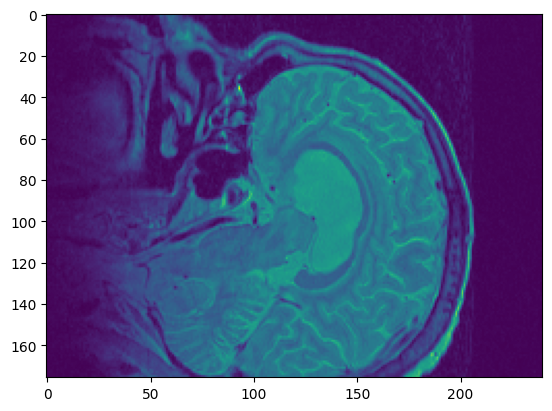

In [12]:
plt.imshow(train_x_image[0] * 255)

In [13]:
# Image NN
input_image = Input(shape = (176, 240, 1), name = "input_image")
conv1 = Conv2D(32, (3, 3), strides = 1, padding = 'same', activation = 'relu')(input_image)
maxpool1 = MaxPool2D((2, 2), strides = 2, padding = 'same')(conv1)

conv2 = Conv2D(32, (3, 3), strides = 1, padding = 'same', activation = 'relu')(maxpool1)
maxpool2 = MaxPool2D((2, 2), strides = 2, padding = 'same')(conv2)

conv3 = Conv2D(32, (3, 3), strides = 1, padding = 'same', activation = 'relu')(maxpool2)
maxpool3 = MaxPool2D((2, 2), strides = 2, padding = 'same')(conv3)

conv4 = Conv2D(32, (3, 3), strides = 1, padding = 'same', activation = 'relu')(maxpool3)
maxpool4 = MaxPool2D((2, 2), strides = 2, padding = 'same')(conv4)

dense_image_1 = Dense(512, activation = 'relu')(maxpool4)
dense_image_2 = Dense(128, activation = 'relu')(dense_image_1)

flatten1 = Flatten()(dense_image_2)
dense_image_3 = Dense(64, activation = 'relu')(flatten1)
dropout1 = Dropout(0.5)(dense_image_3)
dense_image_4 = Dense(64, activation = 'relu')(dropout1)

model_image = Model(inputs = input_image, outputs = dense_image_4)

# Data NN

input_data = Input(shape = (8,), name = "input_data")
dense_data_1 = Dense(16, activation = 'relu')(input_data)
dense_data_2 = Dense(8, activation = 'relu')(dense_data_1)
dense_data_3 = Dense(8, activation = 'relu')(dense_data_2)

model_data = Model(inputs = input_data, outputs = dense_data_3)

concat1 = Concatenate()([model_image.output, model_data.output])
dense_concat = Dense(units = 1, activation = 'sigmoid')(concat1)

model = Model(inputs = [input_image, input_data], outputs = dense_concat)
model.compile(optimizer = "rmsprop", loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_image         │ (None, 176, 240,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 176, 240,  │        320 │ input_image[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 88, 120,   │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 88, 120,   │      9,248 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 44, 60,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 44, 60,    │      9,248 │ max_pooling2d_1[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 22, 30,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 22, 30,    │      9,248 │ max_pooling2d_2[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 11, 15,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 11, 15,    │     16,896 │ max_pooling2d_3[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 11, 15,    │     65,664 │ dense[0][0]       │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 21120)     │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_data          │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │  1,351,744 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 16)        │        144 │ input_data[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 8)         │        136 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64)        │      4,160 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 8)         │         72 │ dense_5[0][0]   

 Total params: 1,466,953 (5.60 MB)

 Trainable params: 1,466,953 (5.60 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, verbose=1, factor=0.5, min_lr=0.000001)

In [15]:
history = model.fit(x = Xtr, y = train_y, epochs = 25, validation_data = (Xval, val_y), callbacks = [learning_rate_reduction])

Epoch 1/25


I0000 00:00:1730752313.683608      69 service.cc:145] XLA service 0x78846000fa70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730752313.683670      69 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 9/90 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8099 - loss: 0.4724

I0000 00:00:1730752319.122095      69 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


90/90 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.8054 - loss: 0.4628 - val_accuracy: 0.7776 - val_loss: 0.4836 - learning_rate: 0.0010
Epoch 2/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8026 - loss: 0.4263 - val_accuracy: 0.7776 - val_loss: 0.4058 - learning_rate: 0.0010
Epoch 3/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8163 - loss: 0.3549 - val_accuracy: 0.8951 - val_loss: 0.3345 - learning_rate: 0.0010
Epoch 4/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8694 - loss: 0.2828 - val_accuracy: 0.8671 - val_loss: 0.2584 - learning_rate: 0.0010
Epoch 5/25
89/90 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9082 - loss: 0.2379
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9082 - loss: 0.2376 - val_accuracy: 0.8769 - val_loss: 0.2293 - learning_rate: 0.0010
Epoch 6/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9154 - loss: 0.2089 - val_accuracy: 0.93

In [16]:
test_x_image = []
test_x_data = []

for i, j in test_x:
    test_x_image.append(i)
    test_x_data.append(j)

test_x_image = np.array(test_x_image) / 255
test_x_data = np.array(test_x_data)

Xte = [test_x_image, test_x_data]
test_y = np.array(test_y)

print("Loss of the model is - ", model.evaluate(Xte, test_y)[0])
print("Accuracy of the model is - ", model.evaluate(Xte, test_y)[1] * 100, '%')

model.save('/kaggle/working/Final_Bin_Model.keras')

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9611 - loss: 0.1024
Loss of the model is -  0.09363958984613419
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9611 - loss: 0.1024
Accuracy of the model is -  96.52855396270752 %


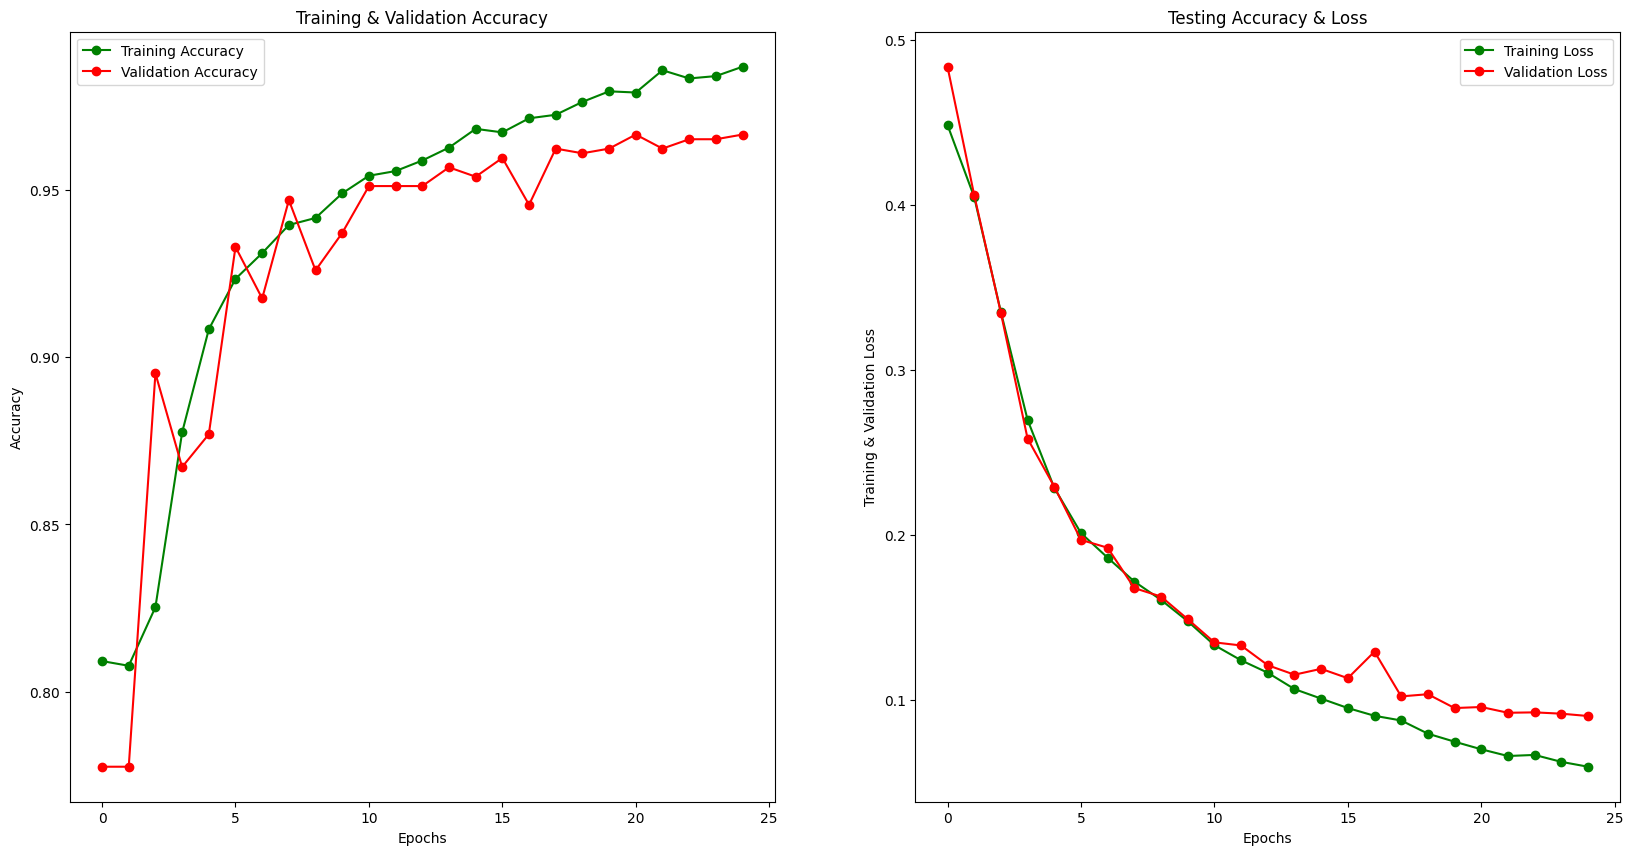

In [17]:
epochs = [i for i in range(25)]
fig, ax = plt.subplots(1, 2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20, 10)

ax[0].plot(epochs, train_acc, 'go-', label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, 'ro-', label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, train_loss, 'g-o', label = 'Training Loss')
ax[1].plot(epochs, val_loss, 'r-o', label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")

plt.show()

In [18]:
predict_y = model.predict(Xte)

for i in range(len(predict_y)):
    if (predict_y[i][0] > 0.5):
        predict_y[i][0] = 1
    else:
        predict_y[i][0] = 0

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [19]:
print(classification_report(test_y, predict_y, target_names = ['Normal (Class 0)', 'Alzheimers (Class 1)']))

                      precision    recall  f1-score   support

    Normal (Class 0)       0.91      0.92      0.92       182
Alzheimers (Class 1)       0.98      0.98      0.98       711

            accuracy                           0.97       893
           macro avg       0.95      0.95      0.95       893
        weighted avg       0.97      0.97      0.97       893



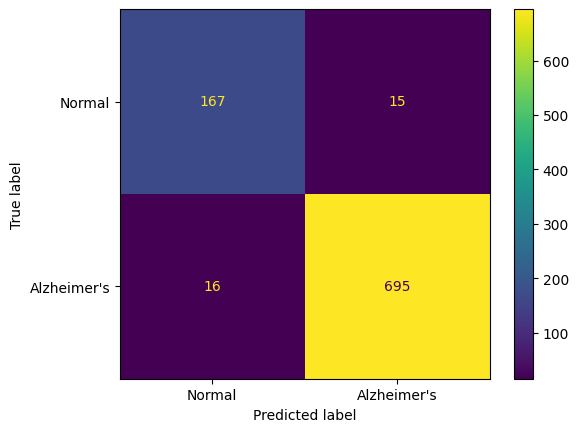

In [20]:
disp = ConfusionMatrixDisplay.from_predictions(test_y, predict_y, display_labels = ["Normal", "Alzheimer's"])

In [21]:
correct = np.where(predict_y == test_y)[1]
incorrect = np.where(predict_y != test_y)[1]

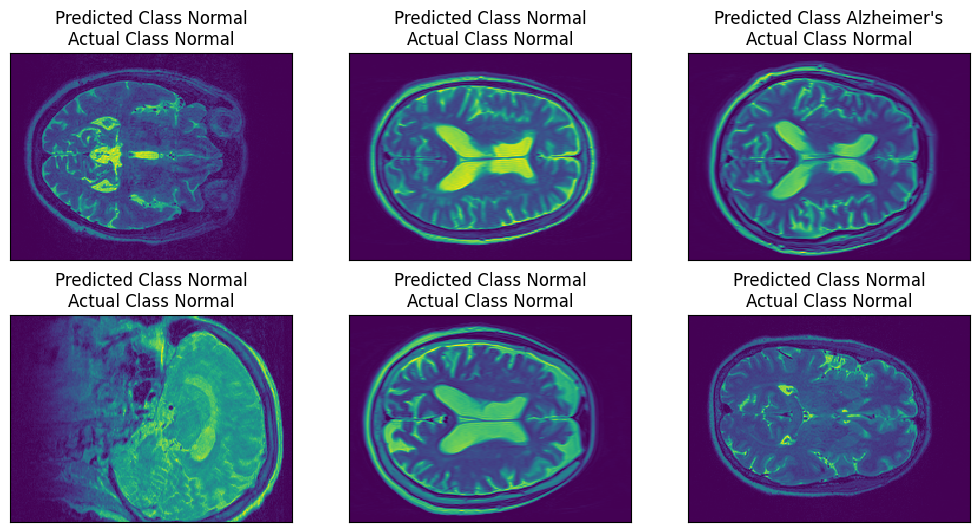

In [22]:
i = 0

for c in correct[:6]:
    plt.subplot(2, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_x_image[c], interpolation='none')

    if (predict_y[c] == 0):
        predict_class = "Normal"
    else:
        predict_class = "Alzheimer's"

    if (test_y[c] == 0):
        true_class = "Normal"
    else:
        true_class = "Alzheimer's"
    
    plt.title("Predicted Class {}\nActual Class {}".format(predict_class, true_class))
    plt.subplots_adjust(top = 7, bottom = 6, left = 5.5, right = 7)
    i += 1

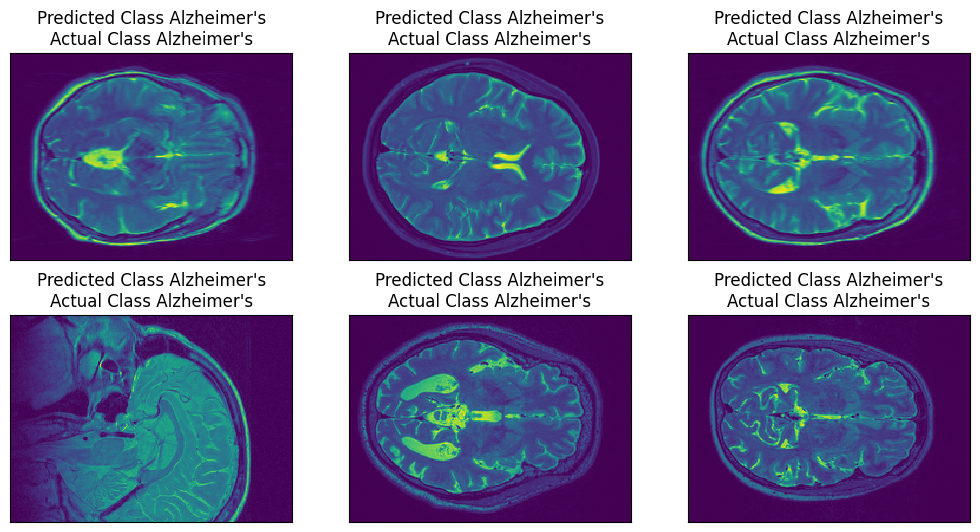

In [23]:
i = 0

for c in incorrect[:6]:
    plt.subplot(2, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_x_image[c], interpolation='none')

    if (predict_y[c] == 0):
        predict_class = "Normal"
    else:
        predict_class = "Alzheimer's"

    if (test_y[c] == 0):
        true_class = "Normal"
    else:
        true_class = "Alzheimer's"

    plt.title("Predicted Class {}\nActual Class {}".format(predict_class, true_class))
    plt.subplots_adjust(top = 7, bottom = 6, left = 5.5, right = 7)
    i += 1